In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [2]:
df = pd.read_csv('Height-Weight Data.csv')
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [3]:
df.shape

(3501, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [5]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [6]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

Text(0, 0.5, 'Weight')

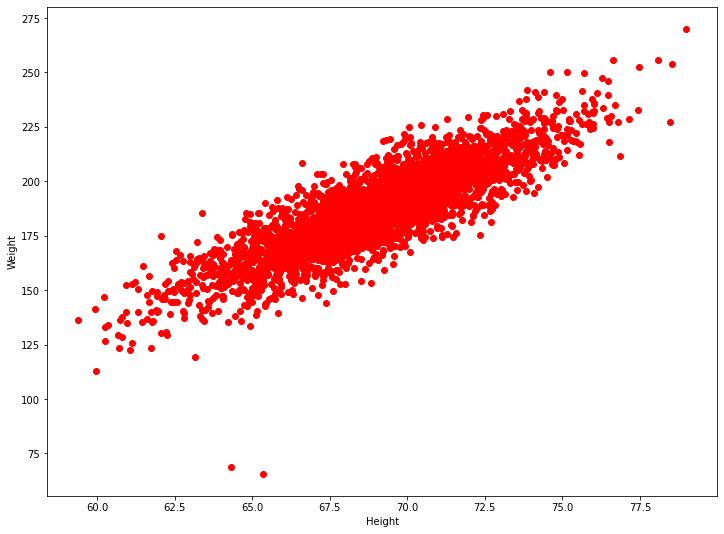

In [18]:
plt.figure(figsize=(12,9))
plt.scatter(df.Height, df.Weight, color = 'red')
plt.xlabel("Height")
plt.ylabel("Weight")

In [19]:
df.Height.mean()

69.02441087268797

In [20]:
df.Weight.mean()

186.89125797946284

In [21]:
len(df.Height)

3501

In [23]:
x = df[['Height']] #independent
y = df['Weight'] #Dependent

In [28]:
xtrain , xtest, ytrain, ytest = tts(x,y, train_size = 0.70 , random_state=1)

In [29]:
xtrain.shape

(2450, 1)

In [30]:
xtrain.head()

,Height
221,66.786927
2696,65.192862
1334,68.390109
3402,68.145621
1159,71.647580


In [31]:
ytrain.head()

221     165.431242
2696    185.348211
1334    179.352182
3402    197.476930
1159    200.286509
Name: Weight, dtype: float64

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression() #create object

In [34]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [37]:
xtrain.shape

(2450, 1)

In [41]:
m = lr.coef_
m

array([5.97744946])

In [43]:
c = lr.intercept_
c

-225.8260300075584

In [44]:
x = 80
y = (m * x) + c

In [45]:
y

array([252.36992693])

In [46]:
lr.predict([[80]])

array([252.36992693])

In [50]:
lr.predict(df[['Height']])

array([215.59078213, 185.31432533, 217.16337956, ..., 215.98249712,
       177.03027812, 208.96748706])

In [51]:
df['predict weight'] = lr.predict(df[['Height']])

In [52]:
df.head()

,Height,Weight,predict weight
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873


In [53]:
testing = lr.predict(xtest)

In [54]:
testing

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [55]:
ytest

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
           ...    
236     185.716910
1125    187.258692
1008    212.204040
2169    193.586535
270     200.202828
Name: Weight, Length: 1051, dtype: float64

In [56]:
xtest['prediction'] = lr.predict(xtest)

In [57]:
xtest.head()

,Height,prediction
719,67.402821,177.070927
2296,69.560033,189.965551
3083,65.809912,167.549393
1296,67.687531,178.772764
2234,65.077902,163.173840


In [58]:
xtest.shape

(1051, 2)

In [59]:
xtrain.shape

(2450, 1)

In [60]:
df.shape

(3501, 3)

In [66]:
xtest = xtest[['Height']]

In [67]:
from sklearn.metrics import mean_squared_error 

In [68]:
prediction = lr.predict(xtest)

In [71]:
mse = mean_squared_error(ytest, prediction) # testing error

In [72]:
mse

110.89221516932379

In [73]:
from sklearn.metrics import mean_absolute_error

In [74]:
mae = mean_absolute_error(ytest, prediction) # testing error

In [75]:
mae

8.279688660993672

In [77]:
lr.predict([[90]])

array([312.14442154])

Text(0.5, 1.0, 'Best fit line Height & Weight')

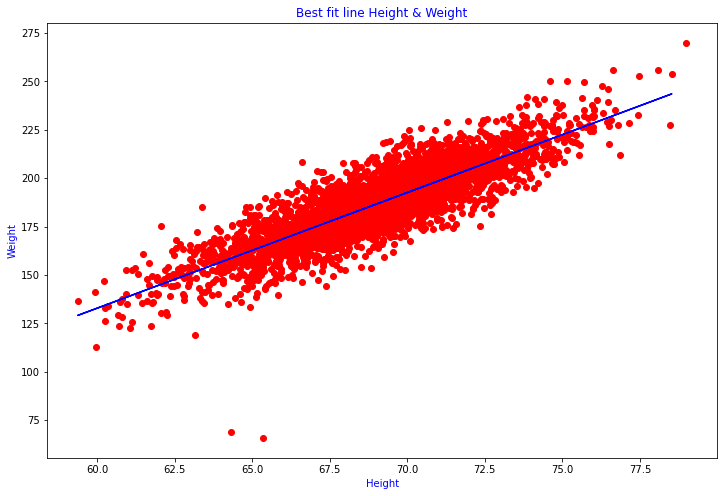

In [94]:
plt.figure(figsize=(12,8))
plt.scatter(df['Height'], df['Weight'], color= 'red')
plt.plot(xtest, lr.predict(xtest), color = 'blue')
plt.xlabel("Height", color = 'Blue')
plt.ylabel("Weight", color = 'Blue')
plt.title('Best fit line Height & Weight' ,color = 'Blue')

In [88]:
lr.score(xtest, ytest)

0.7313258168853622

In [89]:
lr.score(xtrain, ytrain)

0.7327243206606743

In [101]:
lr.predict([[40.98]])

array([19.12984893])